In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [342]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [343]:
df.shape

(62, 2)

In [344]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [346]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


### Outlier detection using IQR

In [347]:
iqr=df.Brain.quantile(0.75)-df.Brain.quantile(0.25)
lower_threshold_Brain=df.Brain.quantile(0.25)-(1.5*iqr)
upper_threshold_Brain=df.Brain.quantile(0.75)+(1.5*iqr)
print(lower_threshold_Brain,upper_threshold_Brain)

-70.80375000000001 119.60625


In [348]:
iqr=df.Body.quantile(0.75)-df.Body.quantile(0.25)
lower_threshold_Body=df.Body.quantile(0.25)-(1.5*iqr)
upper_threshold_Body=df.Body.quantile(0.75)+(1.5*iqr)
print(lower_threshold_Body,upper_threshold_Body)

-238.375 408.625


check how many points that vilolate atleast one of the threshold value

In [349]:
df.loc[(df.Brain>upper_threshold_Brain)|(df.Brain<lower_threshold_Brain)|(df.Body>upper_threshold_Body)|(df.Body<lower_threshold_Body)]

,Brain,Body
3,465.00,423.0
18,2547.00,4603.0
20,187.10,419.0
21,521.00,655.0
27,529.00,680.0
28,207.00,406.0
31,62.00,1320.0
32,6654.00,5712.0
41,250.00,490.0
45,52.16,440.0


clip all these points

In [350]:
df.Brain=df.Brain.clip(lower_threshold_Brain, upper_threshold_Brain)
df.Body=df.Body.clip(lower_threshold_Body, upper_threshold_Body)

In [351]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.176476,104.676532
std,45.213842,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.606250,408.625000


all points are now fall within lower and upper threshold range

### checking for null values

In [352]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

conclusion: no null values

### drop duplicate values

In [353]:
df = df.drop_duplicates()
df.shape

(56, 2)

Conclusion: 6 duplicates removed

In [354]:
df.dtypes

Brain    float64
Body     float64
dtype: object

# EDA

### Histogram

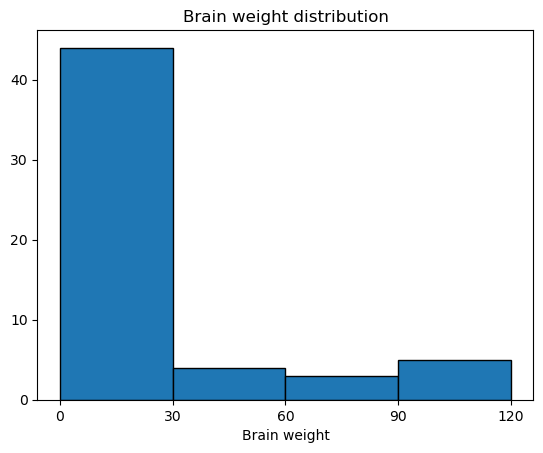

In [355]:
import matplotlib.pyplot as plt
plt.hist(df["Brain"],edgecolor='black', bins=np.arange(0,121,30))
plt.xticks(np.arange(0,121,30))
plt.xlabel("Brain weight");
plt.title("Brain weight distribution");

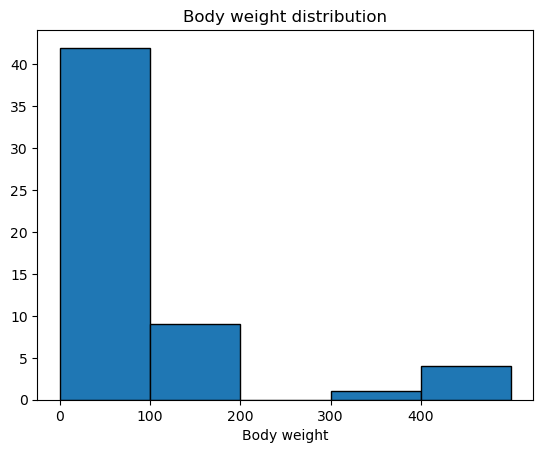

In [356]:
import matplotlib.pyplot as plt
plt.hist(df["Body"],edgecolor='black', bins=np.arange(0,501,100))
plt.xticks(np.arange(0,451,100))
plt.xlabel("Body weight");
plt.title("Body weight distribution");

### Scatter plot

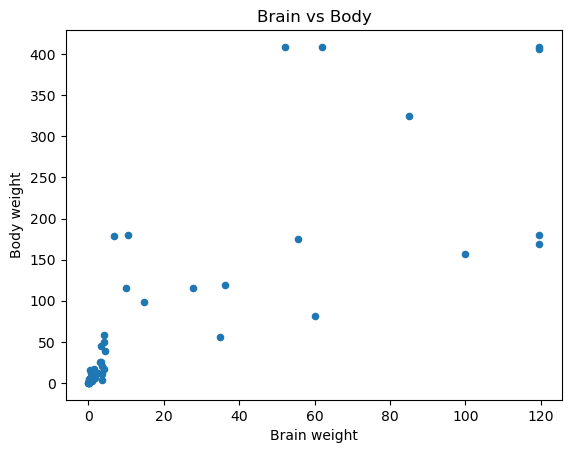

In [357]:
df.plot(x='Brain', y='Body',kind="scatter",style='o',xlabel="Brain weight",ylabel="Body weight",title="Brain vs Body");

By the above plot , we can say that there is linear relationship between 'Brain' and 'Body'

In [358]:
df.corr()

,Brain,Body
Brain,1.000000,0.798773
Body,0.798773,1.000000


correlation value '0.79' indicates there is strong positive correlation exist between 'Brain' and 'Body'

Here first we consider 'Brain' as feature and 'Body' as target

### Train and Test split

In [359]:
X = df[['Brain']].values
y = df['Body'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scaling

In [360]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # 

In [361]:
X_train_scaled.shape,X_test_scaled.shape

((39, 1), (17, 1))

### Modelling

In [362]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [363]:
y_pred=regressor.predict(X_test_scaled)

In [364]:
nw=pd.DataFrame({"Real":y_test,"Predicted":y_pred})
nw

,Real,Predicted
0,6.300,32.446103
1,6.600,30.790275
2,1.000,28.566735
3,408.625,311.349608
4,98.200,63.504703
5,10.800,36.703946
6,50.400,38.442565
7,115.000,93.853662
8,0.330,28.538349
9,5.700,30.601037


In [365]:
coef=pd.DataFrame(regressor.coef_,["Brain"],["Coefficients"])
coef

,Coefficients
Brain,88.987208


In [366]:
print("Intercept is",regressor.intercept_)

Intercept is 83.44461538461539


#### Linear Regression equation(y=mx+c) for this model

Predicted Body=(88.987208*Brain)+(83.4446)

### Matrics

In [367]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.882434844017708


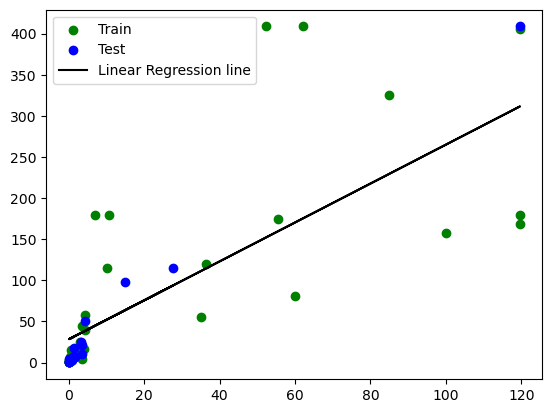

In [368]:
plt.scatter(X_train, y_train,color='g') 
plt.scatter(X_test, y_test,color='b')
plt.plot(X_test, y_pred,color='k') 
plt.legend(["Train","Test","Linear Regression line"])
plt.show()

Now we consider 'Body' as feature and 'Brain' as target

### Train and Test split

In [369]:
X = df[['Body']].values
y = df['Brain'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scaling

In [370]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [371]:
X_train_scaled.shape,X_test_scaled.shape

((39, 1), (17, 1))

### Modelling

In [372]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [373]:
y_pred=regressor.predict(X_test_scaled)

In [374]:
nw=pd.DataFrame({"Real":y_test,"Predicted":y_pred})
nw

,Real,Predicted
0,1.62000,3.371571
1,4.05000,4.667481
2,0.55000,1.288858
3,0.06000,0.964880
4,0.10400,1.311999
5,0.02300,0.826033
6,0.75000,3.579842
7,1.70000,2.191367
8,3.50000,3.232723
9,0.12000,0.964880


In [375]:
coef=pd.DataFrame(regressor.coef_,["Body"],["Coefficients"])
coef

,Coefficients
Body,28.429169


In [376]:
print("Intercept is",regressor.intercept_)

Intercept is 20.72689102564103


#### Linear Regression equation(y=mx+c) for this model

Predicted Brain=(28.429169*Body)+(20.72689102564103)

### Matrics

In [377]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6233848865074729


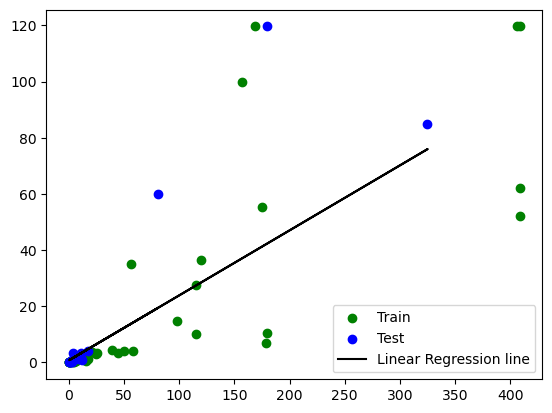

In [378]:
plt.scatter(X_train, y_train,color='g') 
plt.scatter(X_test, y_test,color='b')
plt.plot(X_test, y_pred,color='k') 
plt.legend(["Train","Test","Linear Regression line"])
plt.show()